In [1]:
import os 
import pickle
import numpy as np
import pandas as pd 
from glob import glob 
from sklearn.metrics import accuracy_score, classification_report
from scipy.spatial.distance import mahalanobis

import seaborn as sns

In [2]:
def dtw_distance(x, y, dist='euclidean'):
    m, n = len(x), len(y)
    dtw = np.zeros((m+1, n+1))
    
    # Initialize the first row and column of the DTW matrix
    for i in range(1, m+1):
        dtw[i, 0] = float('inf')
    for j in range(1, n+1):
        dtw[0, j] = float('inf')
    dtw[0, 0] = 0
    
    # Compute the DTW matrix
    for i in range(1, m+1):
        for j in range(1, n+1):
            if dist == 'euclidean':
              cost = euclidean_distance(x[i-1], y[j-1])  # Distance measure between elements x[i-1] and y[j-1]
            if dist == 'mahalanobis':
              cost = mahalanobis_distance(x[i-1], y[j-1])
            dtw[i, j] = cost + min(dtw[i-1, j], dtw[i, j-1], dtw[i-1, j-1])
    
    return dtw[m, n]

def euclidean_distance(a, b):
    # Calculate the distance between two elements a and b
    # Modify this function to use an appropriate distance measure for your multivariate time series
    
    # For example, Euclidean distance can be used as follows:
    return np.linalg.norm(a - b)
    
    # Alternatively, you can use other distance measures like Manhattan distance or cosine similarity
    # pass

def mahalanobis_distance(a, b):
    # Calculate the Mahalanobis distance between two elements a and b
    # cov is the covariance matrix
    # cov = np.array([[1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.],])
    
    cov = np.array([[1., 1. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [1., 1. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.,  0.,  0.,  0.,  0.,  0.,],
                    [0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.,  0.,  0.,  0.,  0.,  0.,],
                    [0., 0., 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 1. , 1. , 0. , 0. ,0.5, 0.5, 0. , 0. , 0. , 0. ,],
                    [0., 0., 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 1. , 1. , 0. , 0. ,0.5, 0.5, 0. , 0. , 0. , 0. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. ,0. , 0. , 0.5, 0.5, 0. , 0. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. ,0. , 0. , 0.5, 0.5, 0. , 0. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,1. , 1. , 0. , 0. , 0.5, 0.5,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,1. , 1. , 0. , 0. , 0.5, 0.5,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.,  0.,  1.,  1.,  0.,  0.,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.,  0.,  1.,  1.,  0.,  0.,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0.5, 0.5, 0. , 0. , 1. , 1. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0.5, 0.5, 0. , 0. , 1. , 1. ,]])
    # Calculate the Mahalanobis distance using the scipy.spatial.distance.mahalanobis function
    return mahalanobis(a, b, cov)




In [3]:
# Example usage
x = np.array([[1, 3, 5], [2, 4, 6], [1, 2, 3]])
y = np.array([[1, 4, 7], [3, 5, 7], [1, 2, 3], [4, 5, 6]])
distance = dtw_distance(x, y)
print("DTW distance:", distance)

DTW distance: 9.164271207775299


In [4]:
x.shape

(3, 3)

---

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data_root = '/content/drive/MyDrive/22_FYP42 - Zero-shot Explainable HAR/epoch_vids/CKIM/PAMAP2/'

In [7]:
with open(f"{data_root}skeleton_label_predictions.pickle", 'rb') as handle:
    pred_skeleton_data = pickle.load(handle)

In [8]:
with open(f"{data_root}skeleton_original_seq.pickle", 'rb') as handle:
    origin_skeleton_data = pickle.load(handle)

In [9]:
_, _, files = next(os.walk(f"{data_root}/videos"))

In [10]:
pred_files, target_files = {}, {}
for f in files:
  id = int(f.split('_')[1])
  if f[-17:] == 'original_skel.mp4':
    target_files[id] = f
  else:
    pred_files[id] = f.split('_m_')[1].split('_')[0]


---

In [11]:
pred_df = pd.DataFrame().from_records(pred_skeleton_data['label'])
pred_df.head()

,id,target,prediction
0,0,standing,standing
1,1,standing,house cleaning
2,2,watching TV,standing
3,3,watching TV,standing
4,4,standing,ascending stairs


In [12]:
# pred_df['matching'] = pred_df['id'].map(pred_files)
# pred_df.head()

---

In [13]:
# PAMAP2
pamap2_super_dict = {
    'Static activities': ['lying', 'sitting', 'standing'],
    'Walking activities': ['walking', 'Nordic walking', 'ascending stairs', 'descending stairs'],
    'House chores': ['vacuum cleaning', 'ironing', 'folding laundry', 'house cleaning'],
    'Sports': ['running', 'cycling', 'playing soccer', 'rope jumping'],
    'Sitting activities': ['watching TV', 'computer work', 'car driving']
}


---

In [14]:
super_class = {}
for i,j in pamap2_super_dict.items():
    for c in j:
        super_class[c] = i 

In [15]:
super_class

{'lying': 'Static activities',
 'sitting': 'Static activities',
 'standing': 'Static activities',
 'walking': 'Walking activities',
 'Nordic walking': 'Walking activities',
 'ascending stairs': 'Walking activities',
 'descending stairs': 'Walking activities',
 'vacuum cleaning': 'House chores',
 'ironing': 'House chores',
 'folding laundry': 'House chores',
 'house cleaning': 'House chores',
 'running': 'Sports',
 'cycling': 'Sports',
 'playing soccer': 'Sports',
 'rope jumping': 'Sports',
 'watching TV': 'Sitting activities',
 'computer work': 'Sitting activities',
 'car driving': 'Sitting activities'}

---

In [17]:
def match_func(r):
  i = r['id']
  i_skel = pred_skeleton_data['data'][i]
  cs, dists = [], []
  for c,f in origin_skeleton_data.items():
    dists.append(dtw_distance(f, i_skel))
    cs.append(c)
  matching_class = cs[np.argmin(np.array(dists))]
  return matching_class

In [18]:
pred_df['matching'] = pred_df.apply(lambda r: match_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching
0,0,standing,standing,sitting
1,1,standing,house cleaning,ironing
2,2,watching TV,standing,computer work
3,3,watching TV,standing,sitting
4,4,standing,ascending stairs,walking


In [21]:
def score_func(r):
  i = r['id']
  i_skel = pred_skeleton_data['data'][i]
  cs, dists = [], []
  for c,f in origin_skeleton_data.items():
    dists.append(dtw_distance(f, i_skel))
    cs.append(c)
  matching_class = np.min(np.array(dists))
  return matching_class

In [22]:
pred_df['matching_dtw_dist'] = pred_df.apply(lambda r: score_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist
0,0,standing,standing,sitting,2.748912
1,1,standing,house cleaning,ironing,3.841447
2,2,watching TV,standing,computer work,3.011371
3,3,watching TV,standing,sitting,2.177320
4,4,standing,ascending stairs,walking,2.700568


---

In [23]:
pred_df['super_target'] = pred_df['target'].map(super_class)
pred_df['super_prediction'] = pred_df['prediction'].map(super_class)
pred_df['super_matching'] = pred_df['matching'].map(super_class)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist,super_target,super_prediction,super_matching
0,0,standing,standing,sitting,2.748912,Static activities,Static activities,Static activities
1,1,standing,house cleaning,ironing,3.841447,Static activities,House chores,House chores
2,2,watching TV,standing,computer work,3.011371,Sitting activities,Static activities,Sitting activities
3,3,watching TV,standing,sitting,2.177320,Sitting activities,Static activities,Static activities
4,4,standing,ascending stairs,walking,2.700568,Static activities,Walking activities,Walking activities


In [24]:
pred_df['correct'] = (pred_df['target'] == pred_df['prediction']).astype(int)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist,super_target,super_prediction,super_matching,correct
0,0,standing,standing,sitting,2.748912,Static activities,Static activities,Static activities,1
1,1,standing,house cleaning,ironing,3.841447,Static activities,House chores,House chores,0
2,2,watching TV,standing,computer work,3.011371,Sitting activities,Static activities,Sitting activities,0
3,3,watching TV,standing,sitting,2.177320,Sitting activities,Static activities,Static activities,0
4,4,standing,ascending stairs,walking,2.700568,Static activities,Walking activities,Walking activities,0


In [25]:
# super class accuracy 
correct_df = pred_df.loc[pred_df['correct'] == 1, :]
print(accuracy_score(y_true=correct_df['super_prediction'], y_pred=correct_df['super_matching']))
print(classification_report(y_true=correct_df['super_prediction'], y_pred=correct_df['super_matching'], zero_division=0))

0.8787878787878788
                    precision    recall  f1-score   support

      House chores       0.93      1.00      0.96        13
Sitting activities       0.00      0.00      0.00         0
            Sports       0.00      0.00      0.00         0
 Static activities       1.00      0.57      0.73         7
Walking activities       1.00      0.92      0.96        13

          accuracy                           0.88        33
         macro avg       0.59      0.50      0.53        33
      weighted avg       0.97      0.88      0.91        33



In [26]:
# super class tendency - predictiion super class 
incorrect_df = pred_df.loc[pred_df['correct'] == 0, :]
print(accuracy_score(y_true=incorrect_df['super_prediction'][:-1], y_pred=incorrect_df['super_matching'][:-1]))
print(classification_report(y_true=incorrect_df['super_prediction'][:-1], y_pred=incorrect_df['super_matching'][:-1], zero_division=0))

0.7333333333333333
                    precision    recall  f1-score   support

      House chores       1.00      1.00      1.00         7
Sitting activities       0.00      0.00      0.00         0
            Sports       0.00      0.00      0.00         0
 Static activities       1.00      0.64      0.78        14
Walking activities       1.00      0.67      0.80         9

          accuracy                           0.73        30
         macro avg       0.60      0.46      0.52        30
      weighted avg       1.00      0.73      0.84        30



In [27]:
# super class tendency - predictiion super class 
incorrect_df = pred_df.loc[pred_df['correct'] == 0, :]
print(accuracy_score(y_true=incorrect_df['super_target'][:-1], y_pred=incorrect_df['super_matching'][:-1]))
print(classification_report(y_true=incorrect_df['super_target'][:-1], y_pred=incorrect_df['super_matching'][:-1], zero_division=0))

0.13333333333333333
                    precision    recall  f1-score   support

      House chores       0.00      0.00      0.00         5
Sitting activities       0.80      0.31      0.44        13
            Sports       0.00      0.00      0.00         0
 Static activities       0.00      0.00      0.00        12
Walking activities       0.00      0.00      0.00         0

          accuracy                           0.13        30
         macro avg       0.16      0.06      0.09        30
      weighted avg       0.35      0.13      0.19        30



In [28]:
# overall interpretability 
print(accuracy_score(y_true=pred_df['super_prediction'][:-1], y_pred=pred_df['super_matching'][:-1]))
print(classification_report(y_true=pred_df['super_prediction'][:-1], y_pred=pred_df['super_matching'][:-1], zero_division=0))

0.8095238095238095
                    precision    recall  f1-score   support

      House chores       0.95      1.00      0.98        20
Sitting activities       0.00      0.00      0.00         0
            Sports       0.00      0.00      0.00         0
 Static activities       1.00      0.62      0.76        21
Walking activities       1.00      0.82      0.90        22

          accuracy                           0.81        63
         macro avg       0.59      0.49      0.53        63
      weighted avg       0.98      0.81      0.88        63



---

In [ ]:
def apply_func(r):
  i = r['id']
  return dtw_distance(origin_skeleton_data[r['matching']], pred_skeleton_data['data'][i])

In [ ]:
pred_df['dtw_distance'] = pred_df.apply(lambda r: apply_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching,super_target,super_prediction,super_matching,correct,dtw_distance
0,0,standing,standing,sitting,Static activities,Static activities,Static activities,1,2.748912
1,1,standing,house cleaning,ironing,Static activities,House chores,House chores,0,3.841447
2,2,watching TV,standing,computer work,Sitting activities,Static activities,Sitting activities,0,3.011371
3,3,watching TV,standing,sitting,Sitting activities,Static activities,Static activities,0,2.177320
4,4,standing,ascending stairs,walking,Static activities,Walking activities,Walking activities,0,2.700568


In [ ]:
def apply_func(r):
  i = r['id']
  return dtw_distance(origin_skeleton_data[r['matching']], pred_skeleton_data['data'][i], dist='mahalanobis')

pred_df['mahalanobis_distance'] = pred_df.apply(lambda r: apply_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching,super_target,super_prediction,super_matching,correct,dtw_distance,mahalanobis_distance
0,0,standing,standing,sitting,Static activities,Static activities,Static activities,1,2.748912,3.327028
1,1,standing,house cleaning,ironing,Static activities,House chores,House chores,0,3.841447,5.001660
2,2,watching TV,standing,computer work,Sitting activities,Static activities,Sitting activities,0,3.011371,4.304220
3,3,watching TV,standing,sitting,Sitting activities,Static activities,Static activities,0,2.177320,2.601304
4,4,standing,ascending stairs,walking,Static activities,Walking activities,Walking activities,0,2.700568,4.998299


In [ ]:
pred_df.loc[pred_df['correct'] == 0, :]['dtw_distance'][:-1].mean(), pred_df.loc[pred_df['correct'] == 0, :]['mahalanobis_distance'][:-1].mean()

(5.776188671163782, 7.387471456462266)

In [ ]:
pred_df.loc[pred_df['correct'] == 0, :]['dtw_distance'][:-1].std(), pred_df.loc[pred_df['correct'] == 0, :]['mahalanobis_distance'][:-1].std()

(8.024296060314104, 9.96583172858763)

In [ ]:
pred_df.loc[pred_df['correct'] == 1, :]['dtw_distance'].mean(), pred_df.loc[pred_df['correct'] == 1, :]['mahalanobis_distance'].mean()

(5.9411763212383875, 7.971688616097917)

In [ ]:
pred_df.loc[pred_df['correct'] == 1, :]['dtw_distance'].std(), pred_df.loc[pred_df['correct'] == 1, :]['mahalanobis_distance'].std()

(8.405297595964745, 10.603110541105437)

In [ ]:
pred_df.loc[pred_df['correct'] == 1, :]

,id,target,prediction,matching,super_target,super_prediction,super_matching,correct,dtw_distance,mahalanobis_distance
0,0,sitting,sitting,standing,Static activities,Static activities,Static activities,1,4.856343,5.874290
1,1,sitting,sitting,lying,Static activities,Static activities,Static activities,1,2.770447,3.581169
2,2,descending stairs,descending stairs,ascending stairs,Walking activities,Walking activities,Walking activities,1,14.144512,12.934602
3,3,descending stairs,descending stairs,walking,Walking activities,Walking activities,Walking activities,1,1.386879,1.900520
4,4,vacuuming,vacuuming,sweeping,House chores,House chores,House chores,1,3.781710,4.761621
...,...,...,...,...,...,...,...,...,...,...
58,58,descending stairs,descending stairs,walking,Walking activities,Walking activities,Walking activities,1,1.336230,1.772452
59,59,descending stairs,descending stairs,ascending stairs,Walking activities,Walking activities,Walking activities,1,16.067393,25.787864
60,60,descending stairs,descending stairs,walking,Walking activities,Walking activities,Walking activities,1,1.270577,1.651606
61,61,vacuuming,vacuuming,sweeping,House chores,House chores,House chores,1,3.806480,4.683501


---

In [29]:
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

def discrete_frechet_distance(P, Q):
    n = len(P)
    m = len(Q)
    
    # Create a memoization table to store computed distances
    memo = np.full((n, m), -1.0)
    
    def _dfs(i, j):
        if memo[i, j] > -1.0:
            return memo[i, j]
        
        result = 0.0
        
        if i == 0 and j == 0:
            result = euclidean_distance(P[0], Q[0])
        elif i > 0 and j == 0:
            result = max(_dfs(i - 1, 0), euclidean_distance(P[i], Q[0]))
        elif i == 0 and j > 0:
            result = max(_dfs(0, j - 1), euclidean_distance(P[0], Q[j]))
        elif i > 0 and j > 0:
            result = max(
                min(
                    _dfs(i - 1, j),
                    _dfs(i - 1, j - 1),
                    _dfs(i, j - 1)
                ),
                euclidean_distance(P[i], Q[j])
            )
        
        memo[i, j] = result
        return result
    
    return _dfs(n - 1, m - 1)


In [30]:
# Example usage
P = np.array([[1, 1], [2, 3], [4, 2], [6, 5]])
Q = np.array([[2, 1], [3, 2], [4, 4], [5, 6]])

dfd = discrete_frechet_distance(P, Q)
print("Discrete Fréchet Distance:", dfd)


Discrete Fréchet Distance: 2.0


In [32]:
label_0 = pred_skeleton_data['label'][0]
data_0 = pred_skeleton_data['data'][0, ...]
print(label_0, data_0.shape)

{'id': 0, 'target': 'standing', 'prediction': 'standing'} (60, 24)


In [33]:
data_0

array([[0.47085175, 0.26553077, 0.40996218, ..., 0.9180937 , 0.4211868 ,
        0.98503935],
       [0.47431222, 0.28182214, 0.40918213, ..., 0.91797066, 0.41983992,
        0.98890847],
       [0.47314104, 0.28163216, 0.404891  , ..., 0.91995275, 0.4169047 ,
        0.9844191 ],
       ...,
       [0.4470935 , 0.43997073, 0.38427073, ..., 0.95335615, 0.44558436,
        1.0225968 ],
       [0.44537157, 0.44515014, 0.38153303, ..., 0.956962  , 0.44717276,
        1.0376034 ],
       [0.44168046, 0.43853584, 0.3793134 , ..., 0.9623709 , 0.4477421 ,
        1.0594058 ]], dtype=float32)

In [35]:
sitting = origin_skeleton_data['sitting']
resh_sitting = sitting.reshape((60,12,2))


In [36]:
discrete_frechet_distance(resh_data_0[:,0,:], resh_sitting[:,0,:])

0.021818605488711548

In [37]:
def skeleton_dfd(skel1, skel2):
  rsh_skel1 = skel1.reshape((60,12,2))
  rsh_skel2 = skel2.reshape((60,12,2))

  total_dist = 0.0
  for j in range(12):
    total_dist += discrete_frechet_distance(rsh_skel1[:,j,:], rsh_skel2[:,j,:])

  return total_dist

In [38]:
def fretch_func(r):
  i = r['id']
  match_class = r['matching']
  i_skel = pred_skeleton_data['data'][i]
  match_skel = origin_skeleton_data[match_class]
  dist = skeleton_dfd(i_skel, match_skel)
  return dist

In [39]:
pred_df['dfd_dist'] = pred_df.apply(lambda r: fretch_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist,super_target,super_prediction,super_matching,correct,dfd_dist
0,0,standing,standing,sitting,2.748912,Static activities,Static activities,Static activities,1,0.242017
1,1,standing,house cleaning,ironing,3.841447,Static activities,House chores,House chores,0,0.675615
2,2,watching TV,standing,computer work,3.011371,Sitting activities,Static activities,Sitting activities,0,0.270154
3,3,watching TV,standing,sitting,2.177320,Sitting activities,Static activities,Static activities,0,0.219758
4,4,standing,ascending stairs,walking,2.700568,Static activities,Walking activities,Walking activities,0,0.192138


In [40]:
pred_df.loc[pred_df['correct'] == 0, :]['matching_dtw_dist'][:-1].mean(), pred_df.loc[pred_df['correct'] == 0, :]['dfd_dist'][:-1].mean()

(4.345504926863964, 0.4406240064741433)

In [41]:
pred_df.loc[pred_df['correct'] == 0, :]['matching_dtw_dist'][:-1].std(), pred_df.loc[pred_df['correct'] == 0, :]['dfd_dist'][:-1].std()

(3.8943060797937226, 0.33540847128772333)

In [42]:
pred_df.loc[pred_df['correct'] == 1, :]['matching_dtw_dist'][:-1].mean(), pred_df.loc[pred_df['correct'] == 1, :]['dfd_dist'][:-1].mean()

(4.547200898649618, 0.41760912754146395)

In [43]:
pred_df.loc[pred_df['correct'] == 1, :]['matching_dtw_dist'][:-1].std(), pred_df.loc[pred_df['correct'] == 1, :]['dfd_dist'][:-1].std()

(4.80372687380959, 0.3841909453822926)

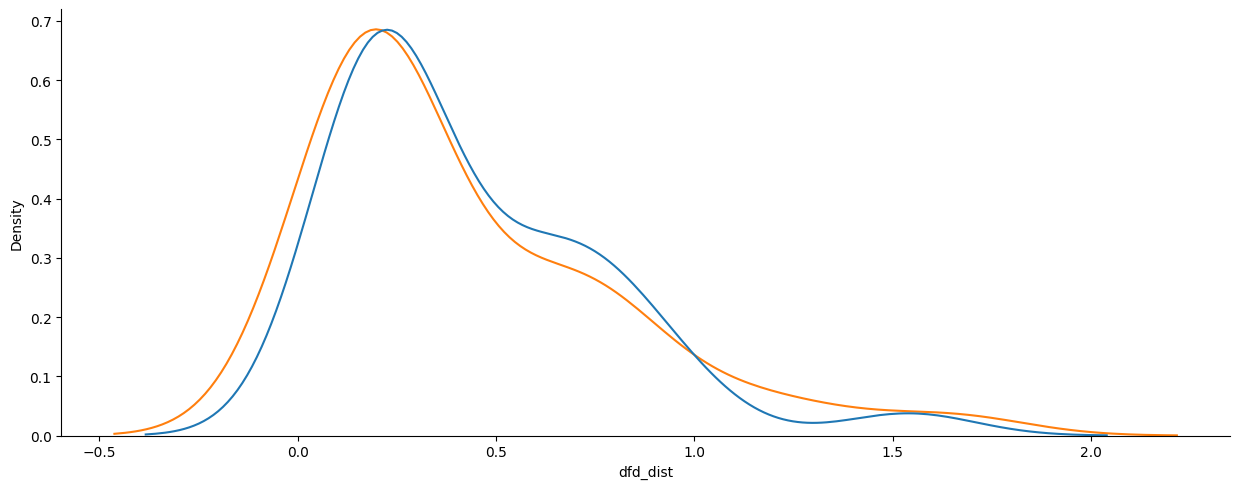

In [45]:
sns_plot = sns.displot(data=pred_df, x="dfd_dist", hue="correct", color='blue', kind="kde", legend=False, height=5, aspect=2.5)